In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.layers import Concatenate
from keras.utils import plot_model

In [2]:
# The data describe the characteristics of a house (surface, number of rooms...)
# and you should predict its price

# The metrics for the ranking will be based on the mean square error ('mse')

df_train = pd.read_csv("Train.csv")
df_train.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,77747,50,1,1,72,98938,8,10,2014,0,1,4829,4204,455,0,3,7786197.4
1,28459,52,0,0,4,50114,1,7,2012,1,1,3570,9363,318,0,6,2846923.2
2,34668,69,1,1,12,17366,8,7,2002,0,1,3476,7549,503,1,7,3475230.2
3,64335,4,0,0,83,65939,6,9,2020,1,0,7301,6989,802,0,1,6435779.0
4,22875,86,1,0,95,8661,5,7,1994,0,0,6394,2119,542,0,7,2295511.4


In [3]:
df_test = pd.read_csv("Test.csv")
df_test.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,92649,31,0,0,77,56098,10,8,1991,1,1,6811,2656,429,1,8,9271774.1
1,42485,1,0,0,40,23782,7,7,2017,0,1,974,9553,426,0,3,4251851.7
2,65867,37,0,0,92,67725,6,2,1994,1,1,3054,4650,998,1,10,6593211.4
3,2372,41,1,0,5,60320,1,1,2003,0,0,8041,7294,736,1,4,241014.3
4,60514,46,1,1,35,76413,2,1,2019,1,0,9227,737,340,0,8,6059360.9


In [4]:
# Separate input data/output data and store into numpy array

X_train = np.array(df_train.drop('price', axis=1))
y_train = np.array(df_train['price'])/10000

X_test = np.array(df_test.drop('price', axis=1))
y_test = np.array(df_test['price'])/10000

In [5]:
min, max = np.min(X_train, axis = 0), np.max(X_train, axis = 0)

X_train = (X_train - min)/(max - min)
X_test = (X_test - min)/(max - min)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 16) (8000,)
(1000, 16) (1000,)


In [7]:
# define model

def create_model() :

    # Input layer
    x0 = [Input(shape = (16, )) for _ in range (16)]

    # Hiddens layer
    x1 = [Dense(3, input_dim = 16, activation = "relu")(x) for x in x0]

    x2 = [Dense(3, activation = "relu")(x) for x in x1]

    x3 = [Dense(3, activation = "relu")(x) for x in x2]

    x3_temp = x3.copy()

    x4 = [Concatenate()([x3[i], x3[i + 1]]) for i in range (0, len(x3), 2)]

    x5 = [Dense(6, activation = "relu")(x) for x in x4]

    x6 = [Dense(5, activation = "relu")(x) for x in x5]

    x7 = [Concatenate()([x6[i], x6[i + 1]] + x3_temp[2*i : int(4*(i/2 + 1))]) for i in range (0, len(x6), 2)]

    x8 = [Dense(8, activation = "relu")(x) for x in x7]

    x9 = [Dense(8, activation = "relu")(x) for x in x8]

    x10 = [Concatenate()([x9[i], x9[i + 1]]) for i in range (0, len(x9), 2)]

    x11 = [Dense(16, activation = "relu")(x) for x in x10]

    x12 = [Dense(16, activation = "relu")(x) for x in x11]

    x13 = Concatenate()(x12)

    x14 = Dense(256, activation = "relu")(x13)

    # # Output layer
    x15 = Dense(1)(x14)

    # Create model
    model = Model(inputs = x0, outputs = x15)

    plot_model(model, show_shapes = True, to_file = "model_graph_test.png") ;

    model.compile(optimizer = 'rmsprop', loss = ["mse"], metrics = ["mse"])

    return model

In [8]:
model = create_model()

c:\Users\natha\Documents\Programmation\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit([X_train for i in range (16)], y_train, epochs = 5, batch_size = 32)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 199968.0469 - mse: 199968.0469
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30320.5781 - mse: 30320.5781
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2210.7034 - mse: 2210.7034
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1304.9921 - mse: 1304.9921
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 978.9142 - mse: 978.9142


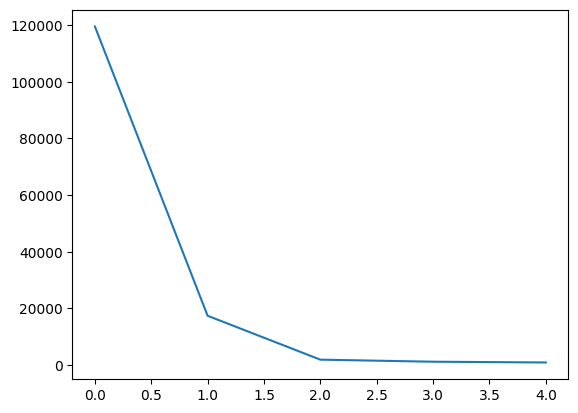

In [10]:
plt.plot(history.history["mse"])

In [11]:
# Import additionnal libraries

from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [13]:
count = 0
validation_loss = []
history_list = []

for train_index, val_index in kfold.split(X_train, y_train) :
    model = create_model()

    stop = EarlyStopping(monitor = "mse", patience = 5, mode = "min")
    checkpoint = ModelCheckpoint(filepath = "my_best_model" + str(count + 1) + ".keras", monitor = "mse", verbose = 1, save_best_only = True, mode = "min")
    callbacks_list = [stop, checkpoint]

    history = model.fit([X_train[train_index, :] for i in range (16)], y_train[train_index], epochs = 100, callbacks = callbacks_list, batch_size = 32, validation_split = 0)
    history_list.append(history)
    validation_loss.append(model.evaluate([X_train[val_index, :] for i in range (16)], y_train[val_index], return_dict = True, verbose = 0)["loss"])
    
    count += 1

c:\Users\natha\Documents\Programmation\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
194/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 230688.9062 - mse: 230688.9062
Epoch 1: mse improved from inf to 143093.15625, saving model to my_best_model1.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 227666.0156 - mse: 227666.0156
Epoch 2/100
175/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50570.7266 - mse: 50570.7266
Epoch 2: mse improved from 143093.15625 to 29210.60742, saving model to my_best_model1.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48010.1680 - mse: 48010.1680
Epoch 3/100
193/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2985.0547 - mse: 2985.0547
Epoch 3: mse improved from 29210.60742 to 2526.17773, saving model to my_best_model1.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2967.2390 - mse: 2967.2390
Epoch 4/100
172/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1624.3779 - mse: 1624.3779
Epoch 4: mse improved from 2526.17773 to 1570.44421, saving model to my_best_model1.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

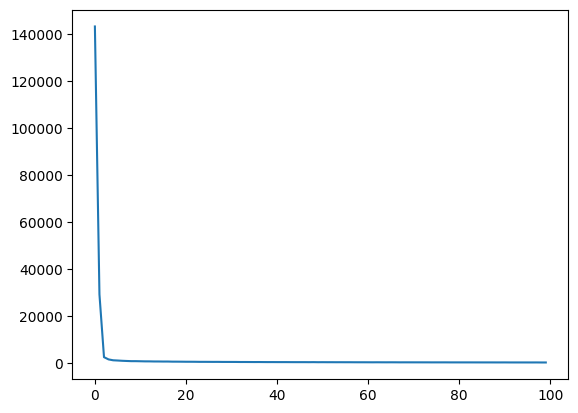

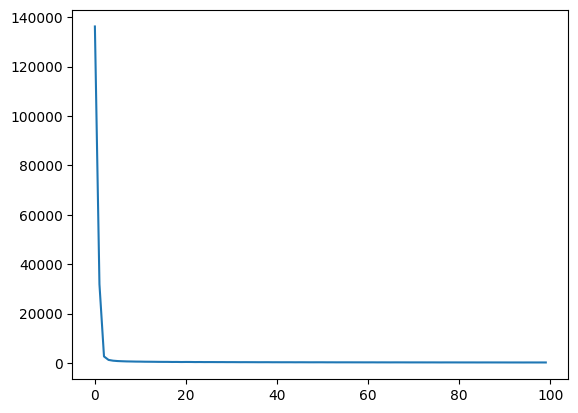

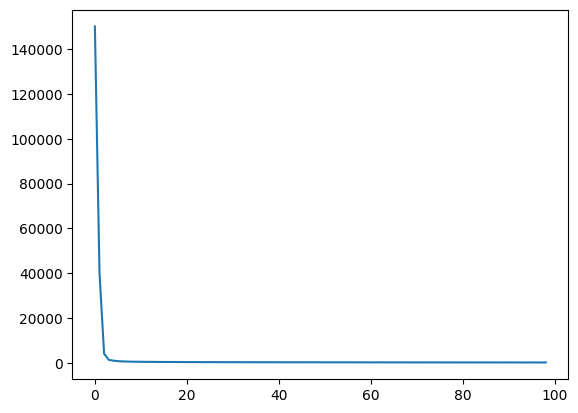

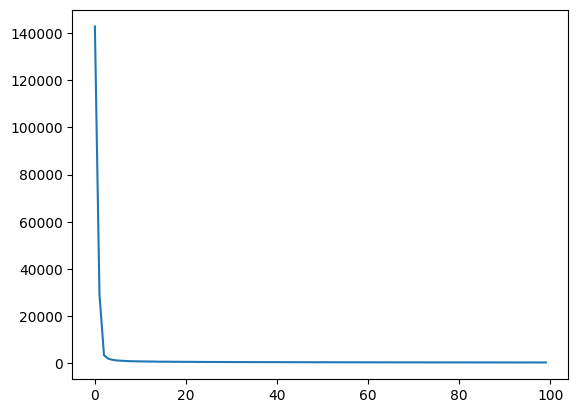

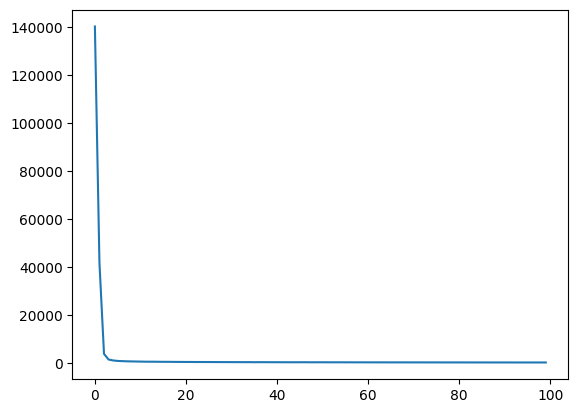

In [14]:
for hist in history_list :
    plt.plot(hist.history["loss"])
    plt.show()

In [15]:
print("average mse and standard deviation: ", np.mean(validation_loss), np.std(validation_loss))

average mse and standard deviation:  186.8068878173828 143.32498551713155


In [16]:
all_model = []
for i in range (1, 6) :
    all_model.append(load_model("my_best_model" + str(i) + ".keras"))

In [17]:
model_predict_moyenne = all_model[0].predict([X_test for i in range (16)])

for i in range(1, 5) :
    model_predict_moyenne += all_model[i].predict([X_test for i in range (16)])

model_predict_moyenne = np.round(model_predict_moyenne/5)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [18]:
print("Mean error: ", (np.sum(np.abs(model_predict_moyenne[:, 0] - y_test)) / len(y_test)))

Mean error:  1.6851351600000017


In [19]:
np.array([model_predict_moyenne[:, 0], y_test])[:, :5]

array([[930.     , 426.     , 662.     ,  23.     , 608.     ],
       [927.17741, 425.18517, 659.32114,  24.10143, 605.93609]])